In [65]:
# Import all the necessary librabries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense

In [2]:
# Read the data from the given files
sites_train = pd.read_csv('./data/Phising_Training_Dataset/Phising_Training_Dataset.csv')

In [3]:
# Check the data for any missing values
sites_train.isnull().sum()

key                            0
having_IP                      0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

#### Note: Since all the columns return 0 there are no missing values for any columns

In [6]:
# Select Features
features = sites_train.drop('Result', axis=1)

# Select Target
target = sites_train['Result']

# Set Training and Testing Data
x_train, x_test, y_train, y_test = train_test_split(features , 
                                                    target, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)

# Display the shape of Training and Testing Data
print('Shape of training feature:', x_train.shape)
print('Shape of testing feature:', x_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (7164, 31)
Shape of testing feature: (1791, 31)
Shape of training label: (7164,)
Shape of training label: (1791,)


#### Decision Tree model

In [8]:
decisionTree = tree.DecisionTreeClassifier(random_state=0)
decisionTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

#### Random Forest model 

In [11]:
randomForest = RandomForestClassifier(random_state=0)
randomForest.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

#### Naive Bayes model

In [12]:
naiveBayes = GaussianNB()
naiveBayes.fit(x_train, y_train)

GaussianNB()

#### KNN model 

In [13]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

#### Evaluation Metric

In [15]:
def evaluation_matrices(model, x_test, y_test):
    
    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall and f1-score
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)

    # Calculate confussion matrix
    confusionMatrix = metrics.confusion_matrix(y_test, y_pred)

    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1, 'confusionMatrix': confusionMatrix}

In [41]:
indexes = []
# Evaluate decisionTree
dt_metric = evaluation_matrices(decisionTree, x_test, y_test)
dt_metric['Model'] = 'Decision Tree'
indexes.append('Decision Tree')

In [42]:
# Evaluate Random Forest
rf_metric = evaluation_matrices(randomForest, x_test, y_test)
rf_metric['Model'] = 'Random Forest'
indexes.append('Random Forest')

In [43]:
# Evaluate Naive Bayes
nb_metric = evaluation_matrices(naiveBayes, x_test, y_test)
nb_metric['Model'] = 'Naive Bayes'
indexes.append('Naive Bayes')

In [44]:
# Evaluate KNN
knn_metric = evaluation_matrices(knn, x_test, y_test)
knn_metric['Model'] = 'KNN'
indexes.append('KNN')

In [45]:
all_metric = pd.DataFrame([dt_metric,rf_metric,nb_metric,knn_metric], index=indexes)

In [46]:
all_metric

,accuracy,precision,reccall,f1,confusionMatrix,Model
Decision Tree,0.941374,0.947988,0.948919,0.948454,"[[720, 53], [52, 966]]",Decision Tree
Random Forest,0.960916,0.958414,0.973477,0.965887,"[[730, 43], [27, 991]]",Random Forest
Naive Bayes,0.890564,0.951648,0.850688,0.898340,"[[729, 44], [152, 866]]",Naive Bayes
KNN,0.610832,0.649860,0.683694,0.666348,"[[398, 375], [322, 696]]",KNN


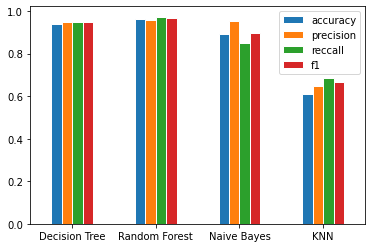

In [48]:
ax = all_metric.plot.bar(rot=0,edgecolor='white')

#### Note: According to the plot above Random forest has higher scores therefore we will proceed with that

In [64]:
# Read test data
sites_test = pd.read_csv('./data/Phising_Testing_Dataset/Phising_Testing_Dataset.csv')

# Predict Result of test data
sites_test['Result'] = randomForest.predict(sites_test)

# Dropping Feature columns
final_result = sites_test[['key','Result']]
# Save new dataframe into csv file
final_result.to_csv('sites_prediction.csv', index=False)
final_result.head(10)

,key,Result
0,21338,1
1,21339,-1
2,21340,-1
3,21341,-1
4,21342,1
5,21343,1
6,21344,1
7,21345,1
8,21346,1
9,21347,-1


In [101]:
model = Sequential() 
model.add(Dense(128, activation='relu', input_dim=31))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 128)               4096      
                                                                 
 dense_36 (Dense)            (None, 1)                 129       
                                                                 
Total params: 4,225
Trainable params: 4,225
Non-trainable params: 0
_________________________________________________________________


In [102]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=100)

Epoch 1/10
72/72 [==============================] - 1s 3ms/step - loss: 308.8197 - accuracy: 0.1333 - val_loss: 26.1561 - val_accuracy: 0.0000e+00
Epoch 2/10
72/72 [==============================] - 0s 2ms/step - loss: 15.3375 - accuracy: 0.0623 - val_loss: 0.9064 - val_accuracy: 0.0000e+00
Epoch 3/10
72/72 [==============================] - 0s 2ms/step - loss: 1.0012 - accuracy: 0.0879 - val_loss: -2.4038 - val_accuracy: 0.1228
Epoch 4/10
72/72 [==============================] - 0s 2ms/step - loss: 0.8643 - accuracy: 0.0891 - val_loss: -0.8549 - val_accuracy: 0.5221
Epoch 5/10
72/72 [==============================] - 0s 2ms/step - loss: -0.0802 - accuracy: 0.0979 - val_loss: 1.1674 - val_accuracy: 0.0000e+00
Epoch 6/10
72/72 [==============================] - 0s 2ms/step - loss: -2.8034 - accuracy: 0.1075 - val_loss: -4.9019 - val_accuracy: 0.1379
Epoch 7/10
72/72 [==============================] - 0s 2ms/step - loss: -5.1370 - accuracy: 0.1210 - val_loss: -5.6470 - val_accuracy: 0.10

[]

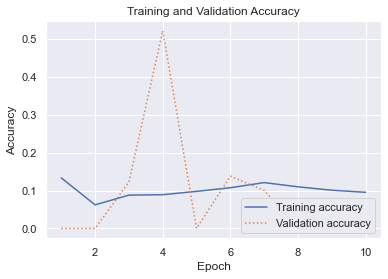

In [103]:
import seaborn as sns
sns.set()
 
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

Text(89.133125, 0.5, 'Actual label')

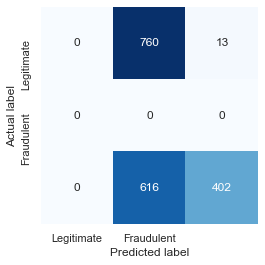

In [82]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(x_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['Legitimate', 'Fraudulent']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')